### Import some modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Define myCallbacks class
After every epoch we can check the accuracy from the logs and stop the model if the desired accuracy is reached. Similar to on_epoch_end there is on_batch_end.

In [2]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') > 0.98):
            print('\nAchieved an accuracy of 98%')
            self.model.stop_training = True
        
# Create an instance of myCallbacks()
callbacks = myCallbacks()            

### Try 1
Building a simple neurel network with a single hidden layer with 512 neurons

In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (128, 128, 3)),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               25166336  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 25,166,849
Trainable params: 25,166,849
Non-trainable params: 0
_________________________________________________________________


### ImageDataGenerator
Keras provides a generator which can label the images automatically based on the directory name. This saves a lot of time by avoiding manually labelling the data and also does not require us to load the entire image set into the file system. 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize the image
train_generator = ImageDataGenerator(rescale = 1/255)

# Creating a generator for training data. Target_size resizes every image into the specified size.
train_data = train_generator.flow_from_directory(
                '/home/srikar/dataset/training_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

test_genrator = ImageDataGenerator(rescale = 1/255)
# Creating a generator for training data.
test_data = test_genrator.flow_from_directory(
                '/home/srikar/dataset/test_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Fit the model
Instead of traditional model.fit(), we need to use model.fit_generator as we are using ImageDataGenerator.
Specify callbacks to stop training once it reaches the desired accuracy

Even if steps_per_epoch are not specified, keras automatically takes the steps based on batch_size which was defined earlier.

We can take the model into a variable whoch can later be used to access the model parameters.

In [8]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 111s 445ms/step - loss: 3.5809 - acc: 0.5254 - val_loss: 0.8961 - val_acc: 0.5665
Epoch 2/50
250/250 [==============================] - 109s 437ms/step - loss: 1.8350 - acc: 0.5372 - val_loss: 1.1874 - val_acc: 0.5460
Epoch 3/50
250/250 [==============================] - 112s 447ms/step - loss: 0.8476 - acc: 0.5822 - val_loss: 0.7742 - val_acc: 0.5900
Epoch 4/50
250/250 [==============================] - 109s 436ms/step - loss: 0.7737 - acc: 0.5890 - val_loss: 0.6767 - val_acc: 0.5910
Epoch 5/50
250/250 [==============================] - 108s 432ms/step - loss: 0.6780 - acc: 0.6256 - val_loss: 0.7685 - val_acc: 0.5510
Epoch 6/50
250/250 [==============================] - 105s 420ms/step - loss: 0.6996 - acc: 0.6134 - val_loss: 0.7101 - val_acc: 0.5560
Epoch 7/50
250/250 [==============================] - 98s 390ms/step - loss: 0.6812 - acc: 0.6080 - val_loss: 0.6674 - val_acc: 0.6145
Epoch 8/50
250/250 [=============================

In 50 epochs, only 73% accuracy was achieved on training set and 62% on validation data set. 

We can also plot the accuracy and losss graphs.


Text(0.5, 1.0, 'Training and validation loss')

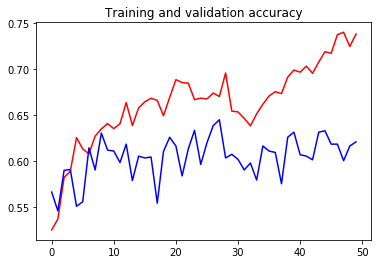

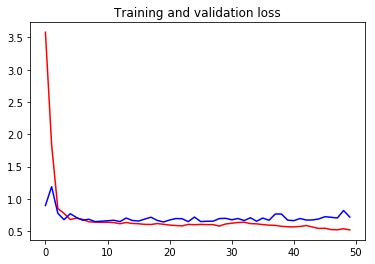

In [11]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

Training accuracy gradually increased and validation accuracy fluctuated a lot but still in the range of 58 ~ 62%.

The validation loss almost plateaued after 4~5 epochs and training loss was almost constant and started to decreased slightly after 40 epochs.

### Try 2
Adding another 1 hidden layer with 1024 neurons

In [13]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (128, 128, 3)),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               25166336  
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 25,692,673
Trainable params: 25,692,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 106s 426ms/step - loss: 1.4338 - acc: 0.5179 - val_loss: 0.6745 - val_acc: 0.6040
Epoch 2/50
250/250 [==============================] - 105s 421ms/step - loss: 0.6864 - acc: 0.5450 - val_loss: 0.6808 - val_acc: 0.5040
Epoch 3/50
250/250 [==============================] - 99s 395ms/step - loss: 0.6850 - acc: 0.5409 - val_loss: 0.6911 - val_acc: 0.5095
Epoch 4/50
250/250 [==============================] - 107s 429ms/step - loss: 0.6928 - acc: 0.5181 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/50
250/250 [==============================] - 118s 471ms/step - loss: 0.6934 - acc: 0.4913 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/50
250/250 [==============================] - 106s 424ms/step - loss: 0.6932 - acc: 0.5026 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/50
250/250 [==============================] - 103s 414ms/step - loss: 0.6937 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/50
250/250 [=============================

Even with another layer of neurons the accuracy did not improve. After 8 epochs, the loss is constant.

### Try 3
Using Convolutional Neural Networks with one Conv and one Max Pooling layer

In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 63504)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8128640   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 8,129,217
Trainable params: 8,129,217
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 106s 424ms/step - loss: 0.7225 - acc: 0.6221 - val_loss: 0.6064 - val_acc: 0.6740
Epoch 2/50
250/250 [==============================] - 118s 470ms/step - loss: 0.5210 - acc: 0.7448 - val_loss: 0.6078 - val_acc: 0.6700
Epoch 3/50
250/250 [==============================] - 128s 514ms/step - loss: 0.4094 - acc: 0.8192 - val_loss: 0.5951 - val_acc: 0.6940
Epoch 4/50
250/250 [==============================] - 74s 296ms/step - loss: 0.2945 - acc: 0.8842 - val_loss: 0.6504 - val_acc: 0.6965
Epoch 5/50
250/250 [==============================] - 66s 263ms/step - loss: 0.1832 - acc: 0.9386 - val_loss: 0.7702 - val_acc: 0.6955
Epoch 6/50
250/250 [==============================] - 65s 260ms/step - loss: 0.1108 - acc: 0.9674 - val_loss: 0.8626 - val_acc: 0.6985
Epoch 7/50
249/250 [============================>.] - ETA: 0s - loss: 0.0592 - acc: 0.9873
Achieved an accuracy of 98%
250/250 [==============================] - 64s 257ms/step - loss: 0.

Using a Convolutional Neural Network an accuracy of 98% was achieved in 8 epochs (so much better than that of a regular Neural Network)

Even the Validation accuracy has reached 71% but this clearly indicates overfitting on the training set.

Text(0.5, 1.0, 'Training and validation loss')

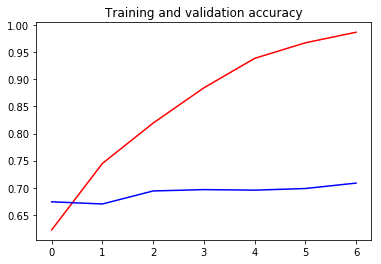

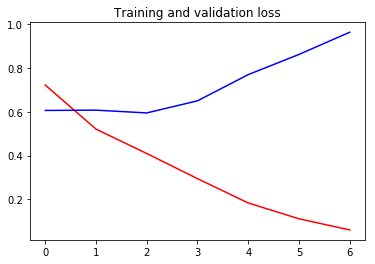

In [7]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

The training accuracy keeps increasing (loss decreases) and the validation accuracy is almost constant after 2 epochs (but the validation loss increases)

### Try 4
Adding more convolutional layers and changing the neurons in the FCN layer. Adding more Pooling layers also reduces the image size by a significant amount.

Removing the callbacks

In [11]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)            

In [12]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63)

Epoch 1/50
250/250 [==============================] - 105s 422ms/step - loss: 0.6753 - acc: 0.5913 - val_loss: 0.6023 - val_acc: 0.6690
Epoch 2/50
250/250 [==============================] - 104s 416ms/step - loss: 0.5651 - acc: 0.7050 - val_loss: 0.5455 - val_acc: 0.7255
Epoch 3/50
250/250 [==============================] - 104s 416ms/step - loss: 0.4956 - acc: 0.7607 - val_loss: 0.5085 - val_acc: 0.7535
Epoch 4/50
250/250 [==============================] - 105s 419ms/step - loss: 0.4292 - acc: 0.7970 - val_loss: 0.4856 - val_acc: 0.7660
Epoch 5/50
250/250 [==============================] - 108s 432ms/step - loss: 0.3708 - acc: 0.8322 - val_loss: 0.4956 - val_acc: 0.7785
Epoch 6/50
250/250 [==============================] - 105s 418ms/step - loss: 0.2998 - acc: 0.8714 - val_loss: 0.5033 - val_acc: 0.7885
Epoch 7/50
250/250 [==============================] - 106s 425ms/step - loss: 0.2260 - acc: 0.8999 - val_loss: 0.5800 - val_acc: 0.7700
Epoch 8/50
250/250 [============================

Text(0.5, 1.0, 'Training and validation loss')

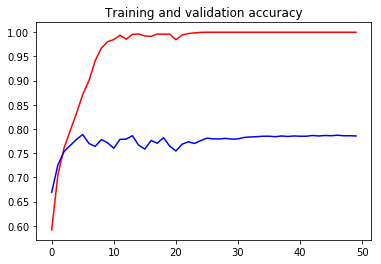

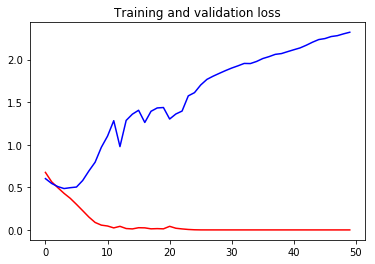

In [13]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

After about 8 epochs, the training accuracy reached 98% but the validation accuracy plateaued at 77%. This is a clear sign of overfitting on the training set. 

Actually, the validation loss starts to increase after a certain point.

One way to avoid overfitting data is to get more data but if we don't have too much data we can use the ImageDataGenerator of keras to augment our data which uses different techniques like flipping, rotating, shearing etc to the images.

### Try 5
We can use the ImageDataGenerater to the earlier CNN and see if the validation accuracy improves

In [14]:
train_generator = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Creating a generator for training data. Target_size resizes every image into the specified size.
train_data = train_generator.flow_from_directory(
                '/home/srikar/dataset/training_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

# Test data remains the same
test_genrator = ImageDataGenerator(rescale = 1/255)
# Creating a generator for training data.
test_data = test_genrator.flow_from_directory(
                '/home/srikar/dataset/test_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)            

In [16]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 195s 779ms/step - loss: 0.7103 - acc: 0.5497 - val_loss: 0.6809 - val_acc: 0.5830
Epoch 2/50
250/250 [==============================] - 178s 714ms/step - loss: 0.6668 - acc: 0.5955 - val_loss: 0.6548 - val_acc: 0.6030
Epoch 3/50
250/250 [==============================] - 181s 722ms/step - loss: 0.6541 - acc: 0.6090 - val_loss: 0.6414 - val_acc: 0.6385
Epoch 4/50
250/250 [==============================] - 158s 632ms/step - loss: 0.6417 - acc: 0.6267 - val_loss: 0.6012 - val_acc: 0.6890
Epoch 5/50
250/250 [==============================] - 173s 693ms/step - loss: 0.6205 - acc: 0.6455 - val_loss: 0.6074 - val_acc: 0.6680
Epoch 6/50
250/250 [==============================] - 170s 681ms/step - loss: 0.6027 - acc: 0.6700 - val_loss: 0.5700 - val_acc: 0.7150
Epoch 7/50
250/250 [==============================] - 178s 713ms/step - loss: 0.5968 - acc: 0.6862 - val_loss: 0.5388 - val_acc: 0.7445
Epoch 8/50
250/250 [============================

W0711 15:36:25.259484 140543325484800 callbacks.py:257] Method (on_train_batch_end) is slow compared to the batch update (0.473748). Check your callbacks.


250/250 [==============================] - 452s 2s/step - loss: 0.5758 - acc: 0.7013 - val_loss: 0.5175 - val_acc: 0.7535
Epoch 11/50
250/250 [==============================] - 137s 547ms/step - loss: 0.5672 - acc: 0.7109 - val_loss: 0.5487 - val_acc: 0.7115
Epoch 12/50
250/250 [==============================] - 136s 543ms/step - loss: 0.5521 - acc: 0.7234 - val_loss: 0.5083 - val_acc: 0.7650
Epoch 13/50
250/250 [==============================] - 122s 486ms/step - loss: 0.5543 - acc: 0.7170 - val_loss: 0.5005 - val_acc: 0.7615
Epoch 14/50
250/250 [==============================] - 120s 481ms/step - loss: 0.5400 - acc: 0.7219 - val_loss: 0.5189 - val_acc: 0.7495
Epoch 15/50
250/250 [==============================] - 122s 489ms/step - loss: 0.5423 - acc: 0.7270 - val_loss: 0.4690 - val_acc: 0.7830
Epoch 16/50
250/250 [==============================] - 121s 485ms/step - loss: 0.5443 - acc: 0.7280 - val_loss: 0.4900 - val_acc: 0.7630
Epoch 17/50
250/250 [==============================] - 1

In [17]:
histories = []
histories.append(history)

In [18]:
histories

Text(0.5, 1.0, 'Training and validation loss')

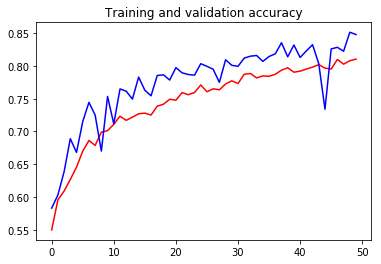

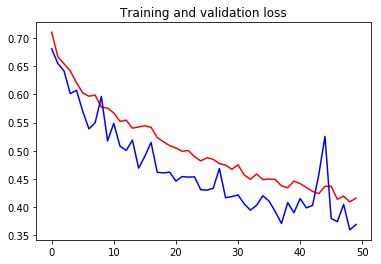

In [20]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

Both the training and validation accuracy keep increasing with the number of epochs and the losses also keep decreasing. If we run for more epochs the loss might decrease even further.

The data augmentation is a useful technique for improving the accuracy. If the validation set is not very different from the train set then data augmentation might actually give worse accuracy on the validation set as it won't encounter any such type of processed images.

# ADDING DROPOUT

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0,9.0], dtype=float)
ys = np.array([1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0], dtype=float)

model.fit(xs,ys, epochs = 1000)

Epoch 1/1000
9/9 [==============================] - 0s 28ms/sample - loss: 1799.7493
Epoch 2/1000
9/9 [==============================] - 0s 158us/sample - loss: 320.7610
Epoch 3/1000
9/9 [==============================] - 0s 228us/sample - loss: 138.2144
Epoch 4/1000
9/9 [==============================] - 0s 219us/sample - loss: 115.1899
Epoch 5/1000
9/9 [==============================] - 0s 300us/sample - loss: 111.7981
Epoch 6/1000
9/9 [==============================] - 0s 184us/sample - loss: 110.8264
Epoch 7/1000
9/9 [==============================] - 0s 213us/sample - loss: 110.1571
Epoch 8/1000
9/9 [==============================] - 0s 228us/sample - loss: 109.5295
Epoch 9/1000
9/9 [==============================] - 0s 194us/sample - loss: 108.9115
Epoch 10/1000
9/9 [==============================] - 0s 253us/sample - loss: 108.2991
Epoch 11/1000
9/9 [==============================] - 0s 222us/sample - loss: 107.6918
Epoch 12/1000
9/9 [==============================] - 0s 307us/s

Epoch 98/1000
9/9 [==============================] - 0s 407us/sample - loss: 70.1210
Epoch 99/1000
9/9 [==============================] - 0s 397us/sample - loss: 69.8267
Epoch 100/1000
9/9 [==============================] - 0s 279us/sample - loss: 69.5348
Epoch 101/1000
9/9 [==============================] - 0s 273us/sample - loss: 69.2453
Epoch 102/1000
9/9 [==============================] - 0s 366us/sample - loss: 68.9582
Epoch 103/1000
9/9 [==============================] - 0s 198us/sample - loss: 68.6734
Epoch 104/1000
9/9 [==============================] - 0s 452us/sample - loss: 68.3910
Epoch 105/1000
9/9 [==============================] - 0s 200us/sample - loss: 68.1109
Epoch 106/1000
9/9 [==============================] - 0s 195us/sample - loss: 67.8331
Epoch 107/1000
9/9 [==============================] - 0s 190us/sample - loss: 67.5575
Epoch 108/1000
9/9 [==============================] - 0s 254us/sample - loss: 67.2842
Epoch 109/1000
9/9 [==============================] - 0s

Epoch 194/1000
9/9 [==============================] - 0s 453us/sample - loss: 50.5105
Epoch 195/1000
9/9 [==============================] - 0s 410us/sample - loss: 50.3770
Epoch 196/1000
9/9 [==============================] - 0s 240us/sample - loss: 50.2446
Epoch 197/1000
9/9 [==============================] - 0s 272us/sample - loss: 50.1132
Epoch 198/1000
9/9 [==============================] - 0s 239us/sample - loss: 49.9829
Epoch 199/1000
9/9 [==============================] - 0s 217us/sample - loss: 49.8537
Epoch 200/1000
9/9 [==============================] - 0s 319us/sample - loss: 49.7256
Epoch 201/1000
9/9 [==============================] - 0s 560us/sample - loss: 49.5985
Epoch 202/1000
9/9 [==============================] - 0s 497us/sample - loss: 49.4724
Epoch 203/1000
9/9 [==============================] - 0s 212us/sample - loss: 49.3474
Epoch 204/1000
9/9 [==============================] - 0s 322us/sample - loss: 49.2234
Epoch 205/1000
9/9 [==============================] - 

Epoch 290/1000
9/9 [==============================] - 0s 427us/sample - loss: 41.6127
Epoch 291/1000
9/9 [==============================] - 0s 194us/sample - loss: 41.5521
Epoch 292/1000
9/9 [==============================] - 0s 230us/sample - loss: 41.4920
Epoch 293/1000
9/9 [==============================] - 0s 186us/sample - loss: 41.4324
Epoch 294/1000
9/9 [==============================] - 0s 212us/sample - loss: 41.3733
Epoch 295/1000
9/9 [==============================] - 0s 182us/sample - loss: 41.3147
Epoch 296/1000
9/9 [==============================] - 0s 186us/sample - loss: 41.2565
Epoch 297/1000
9/9 [==============================] - 0s 182us/sample - loss: 41.1989
Epoch 298/1000
9/9 [==============================] - 0s 207us/sample - loss: 41.1417
Epoch 299/1000
9/9 [==============================] - 0s 209us/sample - loss: 41.0850
Epoch 300/1000
9/9 [==============================] - 0s 220us/sample - loss: 41.0287
Epoch 301/1000
9/9 [==============================] - 

Epoch 386/1000
9/9 [==============================] - 0s 938us/sample - loss: 37.5755
Epoch 387/1000
9/9 [==============================] - 0s 241us/sample - loss: 37.5480
Epoch 388/1000
9/9 [==============================] - 0s 447us/sample - loss: 37.5207
Epoch 389/1000
9/9 [==============================] - 0s 405us/sample - loss: 37.4937
Epoch 390/1000
9/9 [==============================] - 0s 321us/sample - loss: 37.4669
Epoch 391/1000
9/9 [==============================] - 0s 216us/sample - loss: 37.4403
Epoch 392/1000
9/9 [==============================] - 0s 321us/sample - loss: 37.4139
Epoch 393/1000
9/9 [==============================] - 0s 249us/sample - loss: 37.3877
Epoch 394/1000
9/9 [==============================] - 0s 235us/sample - loss: 37.3618
Epoch 395/1000
9/9 [==============================] - 0s 278us/sample - loss: 37.3360
Epoch 396/1000
9/9 [==============================] - 0s 184us/sample - loss: 37.3105
Epoch 397/1000
9/9 [==============================] - 

Epoch 482/1000
9/9 [==============================] - 0s 228us/sample - loss: 35.7437
Epoch 483/1000
9/9 [==============================] - 0s 206us/sample - loss: 35.7312
Epoch 484/1000
9/9 [==============================] - 0s 188us/sample - loss: 35.7189
Epoch 485/1000
9/9 [==============================] - 0s 209us/sample - loss: 35.7066
Epoch 486/1000
9/9 [==============================] - 0s 237us/sample - loss: 35.6944
Epoch 487/1000
9/9 [==============================] - 0s 195us/sample - loss: 35.6824
Epoch 488/1000
9/9 [==============================] - 0s 654us/sample - loss: 35.6704
Epoch 489/1000
9/9 [==============================] - 0s 177us/sample - loss: 35.6585
Epoch 490/1000
9/9 [==============================] - 0s 182us/sample - loss: 35.6467
Epoch 491/1000
9/9 [==============================] - 0s 490us/sample - loss: 35.6351
Epoch 492/1000
9/9 [==============================] - 0s 201us/sample - loss: 35.6235
Epoch 493/1000
9/9 [==============================] - 

Epoch 578/1000
9/9 [==============================] - 0s 269us/sample - loss: 34.9126
Epoch 579/1000
9/9 [==============================] - 0s 235us/sample - loss: 34.9069
Epoch 580/1000
9/9 [==============================] - 0s 253us/sample - loss: 34.9013
Epoch 581/1000
9/9 [==============================] - 0s 245us/sample - loss: 34.8957
Epoch 582/1000
9/9 [==============================] - 0s 334us/sample - loss: 34.8902
Epoch 583/1000
9/9 [==============================] - 0s 231us/sample - loss: 34.8847
Epoch 584/1000
9/9 [==============================] - 0s 228us/sample - loss: 34.8793
Epoch 585/1000
9/9 [==============================] - 0s 776us/sample - loss: 34.8739
Epoch 586/1000
9/9 [==============================] - 0s 419us/sample - loss: 34.8686
Epoch 587/1000
9/9 [==============================] - 0s 331us/sample - loss: 34.8633
Epoch 588/1000
9/9 [==============================] - 0s 246us/sample - loss: 34.8580
Epoch 589/1000
9/9 [==============================] - 

Epoch 674/1000
9/9 [==============================] - 0s 234us/sample - loss: 34.5355
Epoch 675/1000
9/9 [==============================] - 0s 266us/sample - loss: 34.5329
Epoch 676/1000
9/9 [==============================] - 0s 282us/sample - loss: 34.5303
Epoch 677/1000
9/9 [==============================] - 0s 271us/sample - loss: 34.5278
Epoch 678/1000
9/9 [==============================] - 0s 220us/sample - loss: 34.5253
Epoch 679/1000
9/9 [==============================] - 0s 225us/sample - loss: 34.5228
Epoch 680/1000
9/9 [==============================] - 0s 252us/sample - loss: 34.5204
Epoch 681/1000
9/9 [==============================] - 0s 286us/sample - loss: 34.5179
Epoch 682/1000
9/9 [==============================] - 0s 260us/sample - loss: 34.5155
Epoch 683/1000
9/9 [==============================] - 0s 441us/sample - loss: 34.5131
Epoch 684/1000
9/9 [==============================] - 0s 262us/sample - loss: 34.5107
Epoch 685/1000
9/9 [==============================] - 

Epoch 770/1000
9/9 [==============================] - 0s 309us/sample - loss: 34.3643
Epoch 771/1000
9/9 [==============================] - 0s 316us/sample - loss: 34.3632
Epoch 772/1000
9/9 [==============================] - 0s 605us/sample - loss: 34.3620
Epoch 773/1000
9/9 [==============================] - 0s 310us/sample - loss: 34.3609
Epoch 774/1000
9/9 [==============================] - 0s 547us/sample - loss: 34.3597
Epoch 775/1000
9/9 [==============================] - 0s 390us/sample - loss: 34.3586
Epoch 776/1000
9/9 [==============================] - 0s 340us/sample - loss: 34.3575
Epoch 777/1000
9/9 [==============================] - 0s 1ms/sample - loss: 34.3564
Epoch 778/1000
9/9 [==============================] - 0s 309us/sample - loss: 34.3553
Epoch 779/1000
9/9 [==============================] - 0s 513us/sample - loss: 34.3542
Epoch 780/1000
9/9 [==============================] - 0s 877us/sample - loss: 34.3531
Epoch 781/1000
9/9 [==============================] - 0s

Epoch 866/1000
9/9 [==============================] - 0s 290us/sample - loss: 34.2867
Epoch 867/1000
9/9 [==============================] - 0s 478us/sample - loss: 34.2862
Epoch 868/1000
9/9 [==============================] - 0s 263us/sample - loss: 34.2856
Epoch 869/1000
9/9 [==============================] - 0s 353us/sample - loss: 34.2851
Epoch 870/1000
9/9 [==============================] - 0s 288us/sample - loss: 34.2846
Epoch 871/1000
9/9 [==============================] - 0s 293us/sample - loss: 34.2841
Epoch 872/1000
9/9 [==============================] - 0s 558us/sample - loss: 34.2836
Epoch 873/1000
9/9 [==============================] - 0s 562us/sample - loss: 34.2831
Epoch 874/1000
9/9 [==============================] - 0s 225us/sample - loss: 34.2826
Epoch 875/1000
9/9 [==============================] - 0s 482us/sample - loss: 34.2821
Epoch 876/1000
9/9 [==============================] - 0s 298us/sample - loss: 34.2816
Epoch 877/1000
9/9 [==============================] - 

Epoch 962/1000
9/9 [==============================] - 0s 187us/sample - loss: 34.2515
Epoch 963/1000
9/9 [==============================] - 0s 209us/sample - loss: 34.2512
Epoch 964/1000
9/9 [==============================] - 0s 759us/sample - loss: 34.2510
Epoch 965/1000
9/9 [==============================] - 0s 189us/sample - loss: 34.2508
Epoch 966/1000
9/9 [==============================] - 0s 236us/sample - loss: 34.2505
Epoch 967/1000
9/9 [==============================] - 0s 385us/sample - loss: 34.2503
Epoch 968/1000
9/9 [==============================] - 0s 171us/sample - loss: 34.2501
Epoch 969/1000
9/9 [==============================] - 0s 191us/sample - loss: 34.2498
Epoch 970/1000
9/9 [==============================] - 0s 210us/sample - loss: 34.2496
Epoch 971/1000
9/9 [==============================] - 0s 195us/sample - loss: 34.2494
Epoch 972/1000
9/9 [==============================] - 0s 215us/sample - loss: 34.2492
Epoch 973/1000
9/9 [==============================] - 

In [43]:
model.predict([11.0, 12.0])

array([[ 91.43261],
       [101.38289]], dtype=float32)